In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib.cm as cm

In [37]:
def print_simple_number(truth_table,object_type):
    total_N = len(truth_table)
    good_N = len(truth_table[truth_table['best_quality']>=2.5])
    very_good_N = len(truth_table[truth_table['best_quality']==4])
    tmp_table = truth_table.loc[truth_table['best_quality']>=2.5]
    number_of_consistent_z = len(tmp_table.loc[abs(tmp_table['best_z']-tmp_table['Redrock_z'])/(1+tmp_table['best_z'])<0.0033])
    
    print('Number of',object_type,':',total_N)
    print('Number of ',object_type,'with quality>=2.5:',good_N, ' | fration=',good_N*1.0/total_N)
    print('Number of ',object_type,'with quality==4:',very_good_N, ' | fration=',very_good_N*1.0/total_N)
    print('Number of ',object_type,'with consistent z (with quality>=2.5):',number_of_consistent_z, '| fraction=',number_of_consistent_z/total_N)
   
    number_star = len(tmp_table.loc[tmp_table['best_spectype']=='STAR'])
    number_galaxy = len(tmp_table.loc[tmp_table['best_spectype']=='GALAXY'])
    number_qso = len(tmp_table.loc[tmp_table['best_spectype']=='QSO'])
    print('---------')  
    print('Fraction of objects with quality>=2.5')
    print('Star:',number_star*1.0/good_N)
    print('Galaxy:',number_galaxy*1.0/good_N)    
    print('QSO:',number_qso*1.0/good_N)

    plt.hist(truth_table['best_quality'],bins=8,range=(0,4))
    plt.ylabel('Number')
    plt.xlabel('Quality')
    plt.yscale('log')
    plt.xlim(0,4)
  

In [3]:
def plot_redshift_distribution(truth_table,object_type):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = [0,max(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'])]
    plt.hist(truth_table['best_z'],range=(x_range[0],x_range[1]),bins=20,color='b',label='All')
    plt.hist(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='orange',label='quality>=2.5')
    plt.hist(truth_table.loc[truth_table['best_quality']==4]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='g',label='quality=4')
    plt.yscale('log')
    plt.xlabel('Best z')
    plt.ylabel('Number')
    plt.legend()
    plt.title(object_type)
    
    plt.subplot(1,2,2)
    plt.scatter(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],truth_table.loc[truth_table['best_quality']>=2.5]['Redrock_z'],
                
                c=truth_table.loc[truth_table['best_quality']>=2.5]['best_quality'],cmap=cm.jet)
    plt.xlabel('Best z')
    plt.ylabel('Redrock z')
    plt.colorbar()

In [4]:
def plot_chi2_quality_distribution(truth_table):
    #plt.scatter(truth_table['best_quality'],truth_table['DELTACHI2'])
    #plt.ylim(1,100000)
    #plt.yscale('log')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(np.log10(truth_table['DELTACHI2']),label='All',bins=8,range=(0,5),color='b')
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5))
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),)
    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()
    plt.subplot(1,2,2)
    
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']<2.5]['DELTACHI2']),color='grey',label='flag<2.5',bins=8,range=(0,5),histtype='step',lw=4)
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5),histtype='step',lw=4)
    #plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),histtype='step',lw=4)

    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()    
    
    
    
    

In [5]:
def give_me_ra_dec_object_with_property_cut(truth_table, property_name, cut, if_print=True):
    tmp_table = truth_table.loc[(truth_table[property_name]>=cut[0]) & (truth_table[property_name]<cut[1])]
    if if_print==True:
        for i_object in range(0,len(tmp_table)):
            print(tmp_table['TARGET_RA'].values[i_object],tmp_table['TARGET_DEC'].values[i_object])
    
    return tmp_table

In [47]:
# The filenames are tentative. We will change the filenames.
on_nersc=True
if on_nersc==True:
    dir = '/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/'
    ELG = pd.read_csv(dir+'ELG/'+'desi-vi_SV_cascades_combination_ELG_all_210521.csv')
    ELG['DELTACHI2']=ELG['Redrock_deltachi2']
    #ELG_80606 = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')

# ELG selection 0 0.6<z<1.58 short-deep non-repeatable

Number of ELG : 84
Number of  ELG with quality>=2.5: 69  | fration= 0.8214285714285714
Number of  ELG with quality==4: 41  | fration= 0.4880952380952381
Number of  ELG with consistent z (with quality>=2.5): 65 | fraction= 0.7738095238095238
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9420289855072463
QSO: 0.057971014492753624


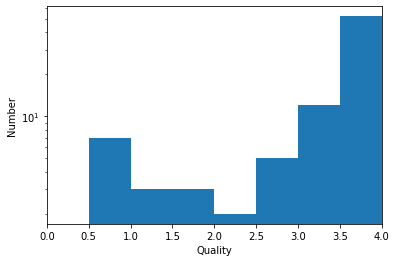

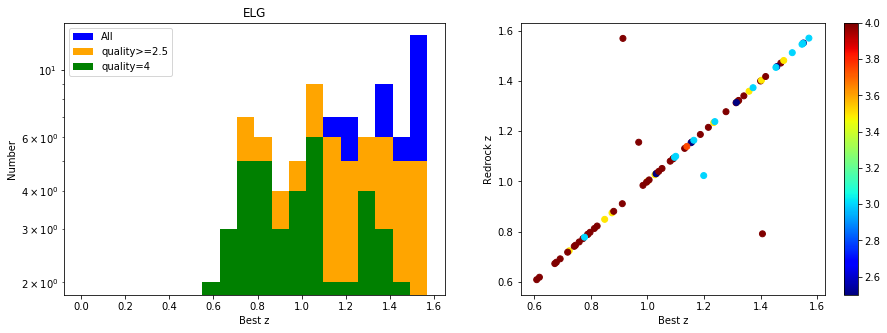

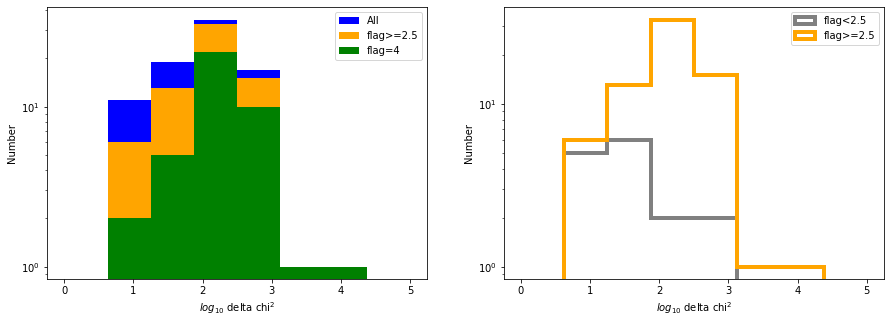

In [58]:
ELG_main = ELG[ELG['setting_name']=='sel0']
print_simple_number(ELG_main,'ELG')
plot_redshift_distribution(ELG_main,'ELG')
plot_chi2_quality_distribution(ELG_main)

# ELG selection 1 low-z<0.6 short-deep non-repeatable

Number of ELG : 279
Number of  ELG with quality>=2.5: 175  | fration= 0.6272401433691757
Number of  ELG with quality==4: 132  | fration= 0.4731182795698925
Number of  ELG with consistent z (with quality>=2.5): 129 | fraction= 0.46236559139784944
---------
Fraction of objects with quality>=2.5
Star: 0.10857142857142857
Galaxy: 0.8114285714285714
QSO: 0.08


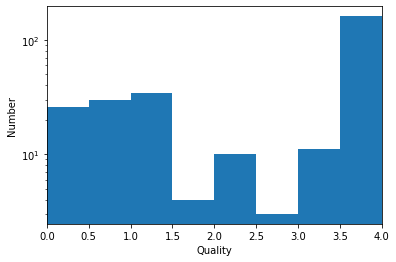

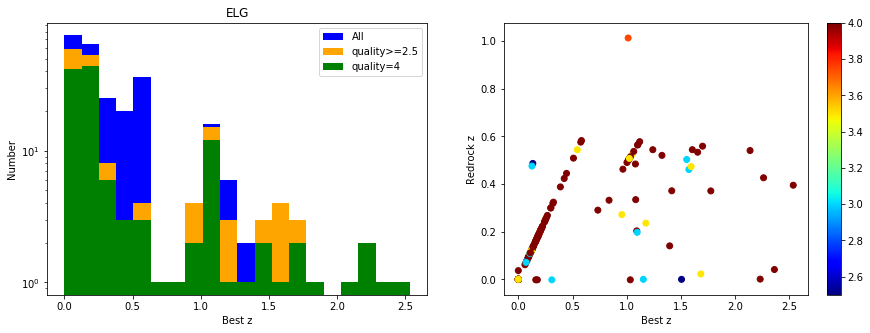

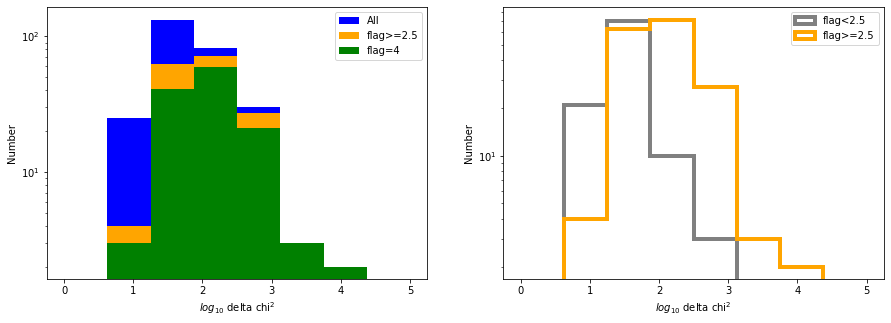

In [55]:
ELG_lowz = ELG[ELG['setting_name']=='sel1']
print_simple_number(ELG_lowz,'ELG')
plot_redshift_distribution(ELG_lowz,'ELG')
plot_chi2_quality_distribution(ELG_lowz)

# ELG selection 2 high-z >1.635 short-deep non-repeatable

Number of ELG : 377
Number of  ELG with quality>=2.5: 343  | fration= 0.9098143236074271
Number of  ELG with quality==4: 267  | fration= 0.7082228116710876
Number of  ELG with consistent z (with quality>=2.5): 261 | fraction= 0.6923076923076923
---------
Fraction of objects with quality>=2.5
Star: 0.011661807580174927
Galaxy: 0.09037900874635568
QSO: 0.8979591836734694


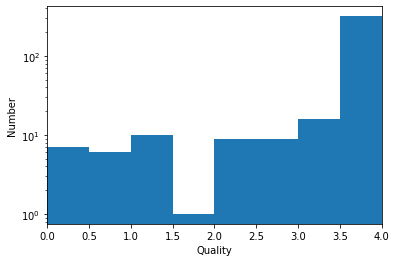

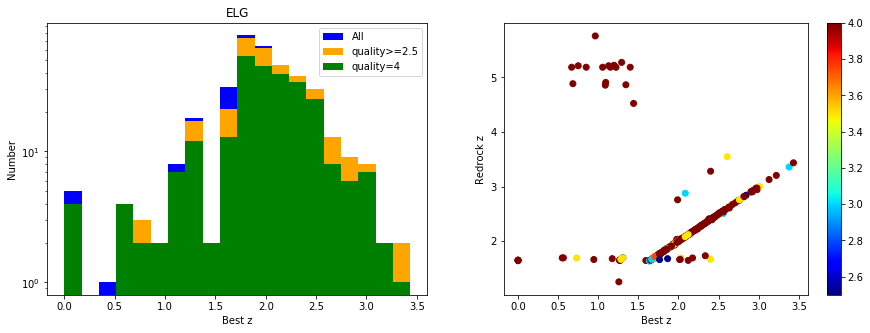

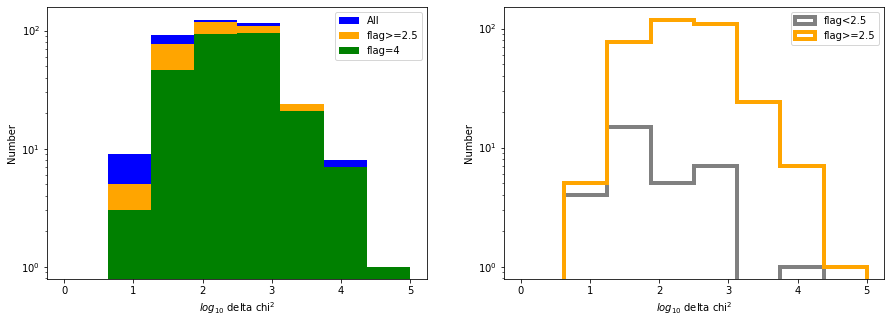

In [54]:
ELG_highz_16 = ELG[ELG['setting_name']=='sel2']
print_simple_number(ELG_highz_16,'ELG')
plot_redshift_distribution(ELG_highz_16,'ELG')
plot_chi2_quality_distribution(ELG_highz_16)

# ELG selection 3 high-z short-deep non-repeatable

Number of ELG : 266
Number of  ELG with quality>=2.5: 150  | fration= 0.5639097744360902
Number of  ELG with quality==4: 69  | fration= 0.2593984962406015
Number of  ELG with consistent z (with quality>=2.5): 129 | fraction= 0.4849624060150376
---------
Fraction of objects with quality>=2.5
Star: 0.013333333333333334
Galaxy: 0.84
QSO: 0.14666666666666667


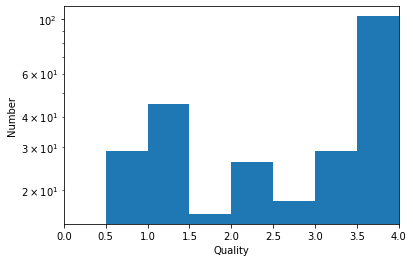

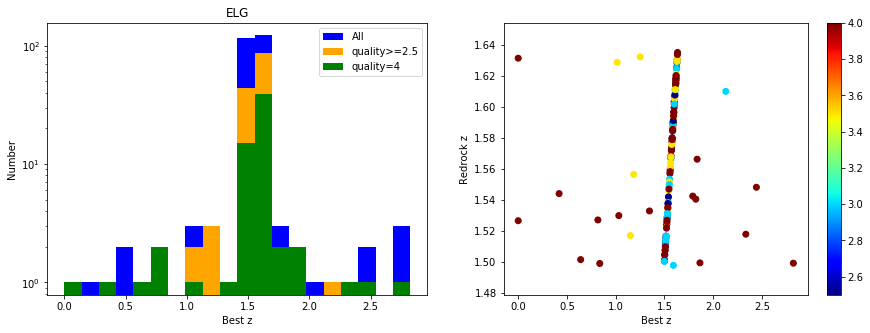

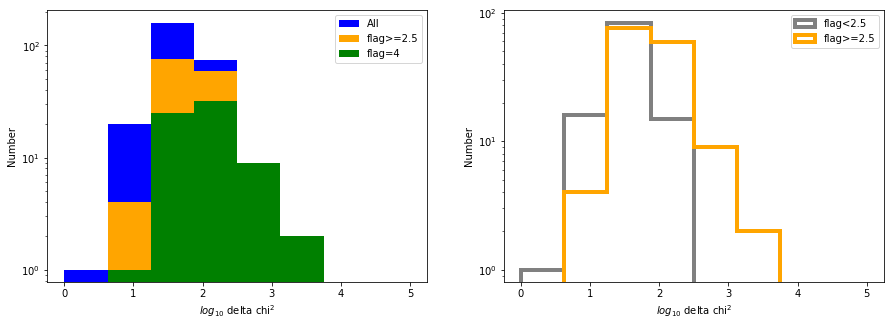

In [49]:
ELG_highz_inconsistent = ELG[ELG['setting_name']=='sel3']
print_simple_number(ELG_highz_inconsistent,'ELG')
plot_redshift_distribution(ELG_highz_inconsistent,'ELG')
plot_chi2_quality_distribution(ELG_highz_inconsistent)

# ELG selection 4 high-z combined deltach2

Number of ELG : 368
Number of  ELG with quality>=2.5: 356  | fration= 0.967391304347826
Number of  ELG with quality==4: 171  | fration= 0.46467391304347827
Number of  ELG with consistent z (with quality>=2.5): 352 | fraction= 0.9565217391304348
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9831460674157303
QSO: 0.016853932584269662


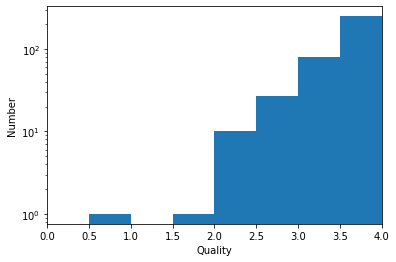

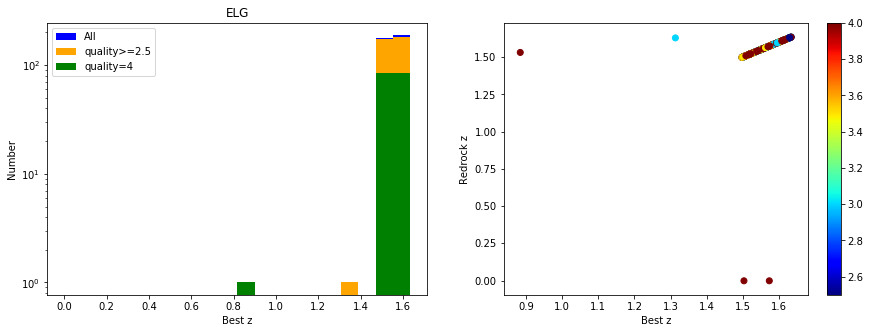

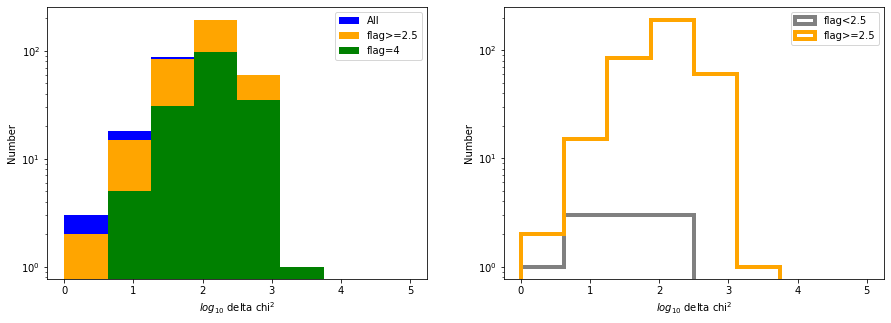

In [48]:
#ELG = pd.read_csv('desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
ELG_highz = ELG[ELG['setting_name']=='sel4']
print_simple_number(ELG_highz,'ELG')
plot_redshift_distribution(ELG_highz,'ELG')
plot_chi2_quality_distribution(ELG_highz)

In [25]:
denali_all = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/denali/testdenali/All/alltiles_Allzinfo.fits')

In [27]:
denali_all = denali_all[denali_all['coadd_type']=='cumulative']

In [28]:
len(denali_all)

728500